In [1]:
import nltk
import string

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px

from matplotlib import cm
from tqdm       import tqdm
from wordcloud  import WordCloud

from nltk.probability import FreqDist
from nltk.corpus      import stopwords
from nltk.tokenize    import sent_tokenize, word_tokenize
from nltk.stem        import PorterStemmer, WordNetLemmatizer

from sklearn         import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, make_scorer, accuracy_score

from sklearn.preprocessing           import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection         import train_test_split, GridSearchCV

from sklearn.naive_bayes   import MultinomialNB, GaussianNB
from sklearn.ensemble      import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble      import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm           import SVC

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
tqdm.pandas()

np.random.seed(0)

[nltk_data] Downloading package stopwords to /home/jojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jojo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/jojo/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv('all_headlines.csv')

In [3]:
df

,headline,real_or_fake
0,India Is In The Middle Of A Coronavirus YouTub...,1
1,"Tweet: False reporting on ""shooting down"" peop...",1
2,"Tweet: A woman eating a delicacy, attributing ...",1
3,Tweet: False chain message about NYPD containm...,1
4,Hoax Alert: Viral 'Emergency Notification' On ...,1
...,...,...
111923,jews to celebrate rosh hashasha or something,1
111924,internal affairs investigator disappointed con...,1
111925,the most beautiful acceptance speech this week...,0
111926,mars probe destroyed by orbiting spielberg-gat...,1


## Bar Plot of Value Counts for Real and Fake Headlines

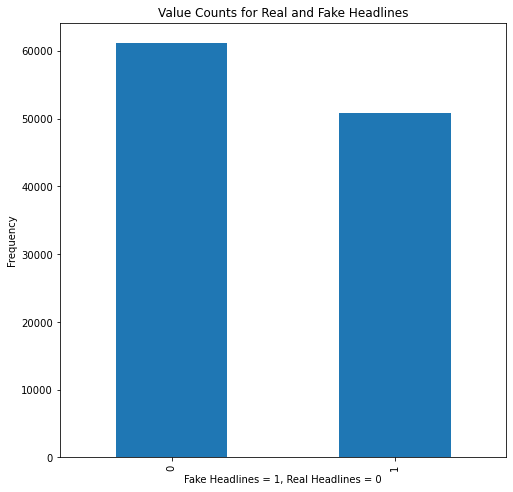

In [4]:
ax = df['real_or_fake'].value_counts().plot(kind='bar', figsize=(8,8), title='Value Counts for Real and Fake Headlines')

ax.set_xlabel('Fake Headlines = 1, Real Headlines = 0')
ax.set_ylabel('Frequency');

In [4]:
sw_list  = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '27', '1', "'ve",
            '-', '–', '—', "n't", 'https', '2', "'re", "'m'", '3', '..', 'ca', "'s", 'amp', 
            'coronavirus', 'covid', 'covid-19', 'coronavirus.', 'covid-19.']

In [5]:
fake = df[df['real_or_fake'] == 1]
real = df[df['real_or_fake'] == 0]

In [6]:
data_fake = fake['headline']
fake_words = [d.split() for d in data_fake.to_list()]

In [7]:
total_fake = set()
for words in fake_words:
    total_fake.update([w.lower() for w in words])
print(len(total_fake))

clean_fake_words = [item.lower() for sublist in fake_words for item in sublist if item.lower() not in sw_list]
fake_freq = FreqDist(clean_fake_words)
fake_freq.most_common(25)

47078


[('trump', 7200),
 ('[video]', 5054),
 ('new', 2753),
 ('(video)', 2543),
 ('man', 2529),
 ('obama', 1970),
 ('hillary', 1671),
 ('trump’s', 1463),
 ('watch:', 1212),
 ('president', 1133),
 ('clinton', 1118),
 ('one', 1108),
 ('white', 1054),
 ('area', 972),
 ('woman', 949),
 ('black', 921),
 ('report:', 918),
 ('donald', 874),
 ('u.s.', 872),
 ('house', 865),
 ('says', 854),
 ('gop', 843),
 ('like', 802),
 ('people', 793),
 ('gets', 773)]

## Horizontal Bar Plots for 25 Most Frequent Words in both Real and Fake Headlines

In [9]:
data_real = real['headline']
real_words = [d.split() for d in data_real.to_list()]

In [10]:
total_real = set()
for words in real_words:
    total_real.update([w.lower for w in words])
print(len(total_real))

clean_real_words = [item.lower() for sublist in real_words for item in sublist if item.lower() not in sw_list]
real_freq = FreqDist(clean_real_words)
top25_real = real_freq.most_common(25)

655625


In [11]:
top25_real

[('trump', 6453),
 ('u.s.', 4415),
 ('says', 4081),
 ('new', 2698),
 ('house', 1764),
 ("trump's", 1397),
 ('people', 1337),
 ('video', 1290),
 ('white', 1192),
 ('north', 1154),
 ('bill', 1094),
 ('president', 1063),
 ('donald', 1054),
 ('state', 997),
 ('police', 949),
 ('shows', 945),
 ('court', 935),
 ('china', 934),
 ('government', 901),
 ('senate', 895),
 ('obama', 887),
 ('clinton', 871),
 ('may', 864),
 ('russia', 858),
 ('korea', 800)]

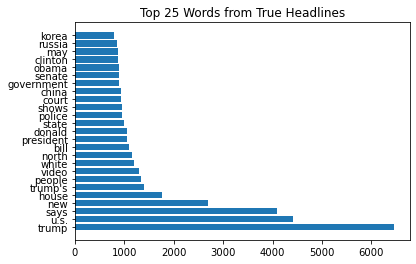

In [12]:
top25_realdf = pd.DataFrame(top25_real)
plt.barh(top25_realdf[0], top25_realdf[1])
plt.title('Top 25 Words from True Headlines')
plt.savefig('top_real_words.png')
plt.show()

In [13]:
covid_fake = pd.read_csv('~/Documents/Flatiron/Phase_5/Data/Headlines/Zenodoheadlines.csv')

In [14]:
covid_fake

,headline,real_or_fake
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0
...,...,...
10196,A Chinese market caused the new coronavirus (v...,0
10197,The peak of the new coronavirus will happen in...,0
10198,Stores and supermarkets in Veracruz (Mexico) w...,0
10199,"A chain message circulated on Tuesday, Jan. 14...",0


In [15]:
data_covid_fake_heads = covid_fake['headline']
cov_fake_words = [d.split() for d in data_covid_fake_heads.to_list()]

total_cov_fake = set()
for words in cov_fake_words:
    total_cov_fake.update([w.lower for w in words])
print(len(total_cov_fake))

clean_cov_fake_words = [item.lower() for sublist in cov_fake_words for item in sublist if item.lower() not in sw_list]
cov_fake_freq = FreqDist(clean_cov_fake_words)
top25_cov_fake = cov_fake_freq.most_common(25)

163225


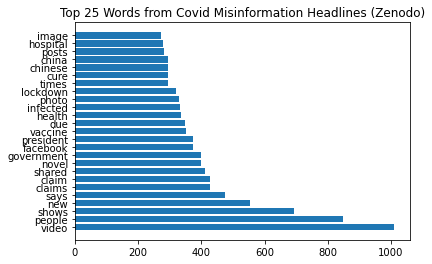

In [16]:
top25_cov_fakedf = pd.DataFrame(top25_cov_fake)
plt.barh(top25_cov_fakedf[0], top25_cov_fakedf[1])
plt.title('Top 25 Words from Covid Misinformation Headlines (Zenodo)')
plt.savefig('top_cov_fake_words.png')
plt.show()

In [17]:
covid_misinfo = pd.read_csv('Data/Headlines/ESOCheadlines_eng.csv')

In [18]:
covid_misinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      1501 non-null   object
 1   real_or_fake  1501 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


18376


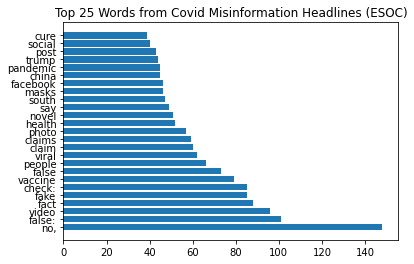

In [19]:
data_covid_misinfo_heads = covid_misinfo['headline']
cov_misinfo_words = [d.split() for d in data_covid_misinfo_heads.to_list()]

total_cov_misinfo = set()
for words in cov_misinfo_words:
    total_cov_misinfo.update([w.lower for w in words])
print(len(total_cov_misinfo))

clean_cov_misinfo_words = [item.lower() for sublist in cov_misinfo_words for item in sublist if item.lower() not in sw_list]
cov_misinfo_freq = FreqDist(clean_cov_misinfo_words)
top25_cov_misinfo = cov_misinfo_freq.most_common(25)

top25_cov_misinfodf = pd.DataFrame(top25_cov_misinfo)
plt.barh(top25_cov_misinfodf[0], top25_cov_misinfodf[1])
plt.title('Top 25 Words from Covid Misinformation Headlines (ESOC)')
plt.savefig('top_cov_misinfo_words.png')
plt.show()

181581


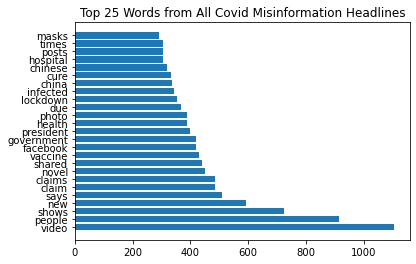

In [20]:
all_fake_misinfo = pd.concat([covid_fake, covid_misinfo], ignore_index=True)
data_all_fake_misinfo_head = all_fake_misinfo['headline']
all_fake_misinfo_words = [d.split() for d in data_all_fake_misinfo_head.tolist()]

total_all_fake_misinfo = set()
for words in all_fake_misinfo_words:
    total_all_fake_misinfo.update([w.lower for w in words])
print(len(total_all_fake_misinfo))

clean_all_fake_misinfo_words = [item.lower() for sublist in all_fake_misinfo_words for item in sublist if item.lower() not in sw_list]
all_fake_misinfo_freq = FreqDist(clean_all_fake_misinfo_words)
top25_all_fake_misinfo = all_fake_misinfo_freq.most_common(25)

top25_all_fake_misinfodf = pd.DataFrame(top25_all_fake_misinfo)
plt.barh(top25_all_fake_misinfodf[0], top25_all_fake_misinfodf[1])
plt.title('Top 25 Words from All Covid Misinformation Headlines')
plt.savefig('top_all_fake_misinfo_words.png')
plt.show()

In [27]:
fake_misinfo200 = all_fake_misinfo_freq.most_common(200)
fake_misinfo200

[('video', 1105),
 ('people', 914),
 ('shows', 726),
 ('new', 592),
 ('says', 511),
 ('claim', 486),
 ('claims', 485),
 ('novel', 451),
 ('shared', 440),
 ('vaccine', 431),
 ('facebook', 420),
 ('government', 418),
 ('president', 400),
 ('health', 388),
 ('photo', 387),
 ('due', 366),
 ('lockdown', 355),
 ('infected', 342),
 ('china', 338),
 ('cure', 333),
 ('chinese', 318),
 ('hospital', 306),
 ('posts', 304),
 ('times', 304),
 ('masks', 293),
 ('image', 292),
 ('social', 290),
 ('patients', 285),
 ('said', 285),
 ('india', 277),
 ('post', 273),
 ('cases', 270),
 ('died', 265),
 ('spread', 265),
 ('virus', 261),
 ('pandemic', 254),
 ('pandemic.', 254),
 ('no,', 250),
 ('police', 239),
 ('indian', 239),
 ('minister', 238),
 ('viral', 220),
 ('state', 218),
 ('bill', 217),
 ('water', 211),
 ('man', 211),
 ('prevent', 209),
 ('deaths', 202),
 ('show', 201),
 ('positive', 201),
 ('multiple', 198),
 ('thousands', 197),
 ('trump', 196),
 ('lockdown.', 195),
 ('fake', 194),
 ('doctor', 193),

## Word Clouds

In [29]:
real_bar_counts = [x[1] for x in top25_real]
real_bar_words = [x[0] for x in top25_real]

fake_bar_counts = [x[1] for x in top25_cov_fake]
fake_bar_words = [x[0] for x in top25_cov_fake]

misinfo_bar_counts = [x[1] for x in top25_cov_misinfo]
misinfo_bar_words = [x[0] for x in top25_cov_misinfo]

all_fake_misinfo_bar_counts = [x[1] for x in top25_all_fake_misinfo]
all_fake_misinfo_bar_words = [x[0] for x in top25_all_fake_misinfo]

In [30]:
real_dict = dict(zip(real_bar_words, real_bar_counts))
fake_dict = dict(zip(fake_bar_words, fake_bar_counts))
misinfo_dict = dict(zip(misinfo_bar_words, misinfo_bar_counts))
all_fake_misinfo_dict = dict(zip(all_fake_misinfo_bar_words, all_fake_misinfo_bar_counts))

In [31]:
all_fake_misinfo_dict

{'video': 1105,
 'people': 914,
 'shows': 726,
 'new': 592,
 'says': 511,
 'claim': 486,
 'claims': 485,
 'novel': 451,
 'shared': 440,
 'vaccine': 431,
 'facebook': 420,
 'government': 418,
 'president': 400,
 'health': 388,
 'photo': 387,
 'due': 366,
 'lockdown': 355,
 'infected': 342,
 'china': 338,
 'cure': 333,
 'chinese': 318,
 'hospital': 306,
 'posts': 304,
 'times': 304,
 'masks': 293}

### Real Headlines Word Cloud

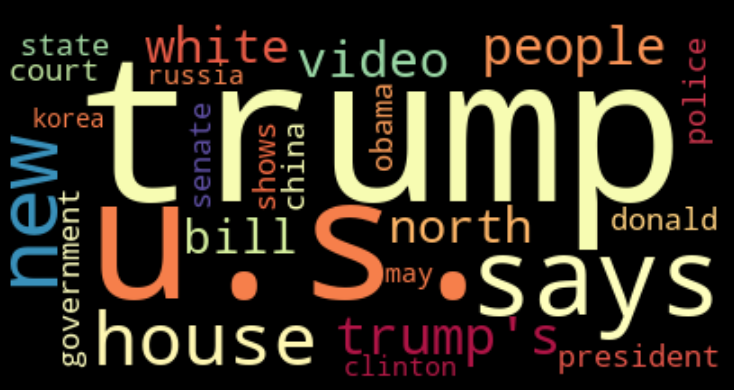

In [32]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(real_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Real Headlines Word Cloud')
plt.tight_layout(pad=0)

plt.savefig('Real_wordcloud.png')

plt.show()

### Fake and Misinformation Word Clouds

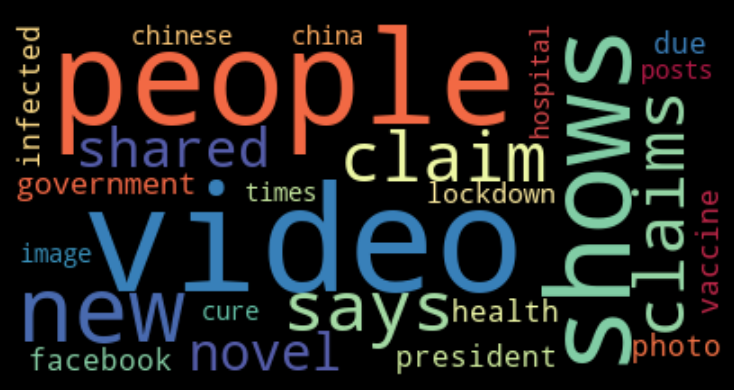

In [33]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fake_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Fake Headlines Word Cloud')
plt.tight_layout(pad=0)

plt.savefig('fake_wordcloud.png')

plt.show()

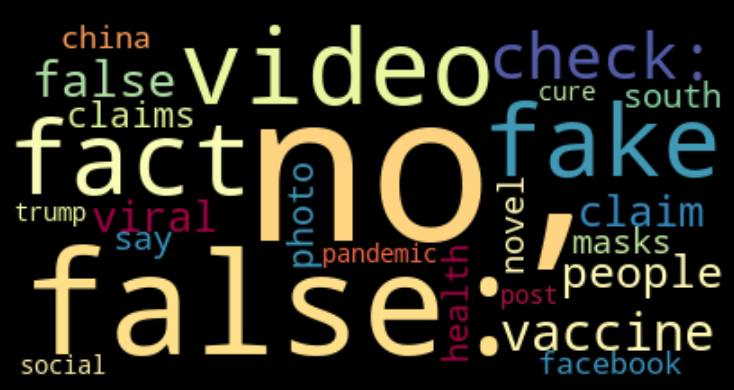

In [34]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(misinfo_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Misinformation Headlines Word Cloud')
plt.tight_layout(pad=0)

plt.savefig('misinfo_wordcloud.png')

plt.show()

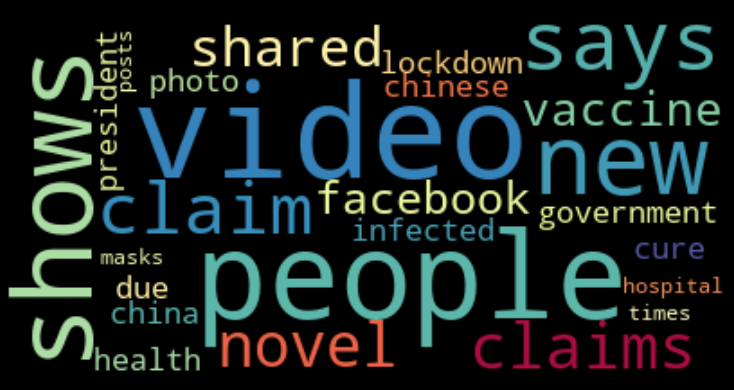

In [35]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(all_fake_misinfo_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Misinformation and Fake Headlines Word Cloud')
plt.tight_layout(pad=0)

plt.savefig('fake_misinfo_wordcloud.png')

plt.show()

### word cloud from all misinfo headlines of top 200 words

In [28]:
fake_misinfo200_bar_counts = [x[1] for x in fake_misinfo200]
fake_misinfo200_bar_words = [x[0] for x in fake_misinfo200]

fake_misinfo200_dict = dict(zip(fake_misinfo200_bar_words, fake_misinfo200_bar_counts))

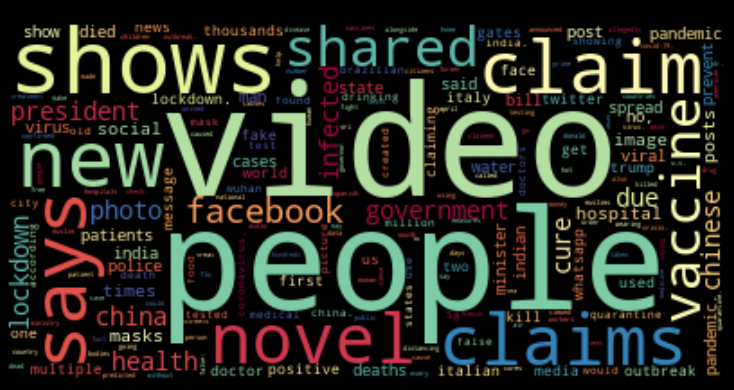

In [29]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fake_misinfo200_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Misinformation and Fake Headlines Word Cloud')
plt.tight_layout(pad=0)

plt.savefig('fake_misinfo_wordcloud200.png')

plt.show()